We want to investigate the relationship between the poles of a second order system, the damping ratio and natural frequency, and the various performance specifications. 

Consider the general second order response for the transfer function:

\begin{align}
    G(s) = \frac{b}{s^2 + a s +b} = \frac{\omega_n^2}{s^2 + 2 \zeta \omega_n s + \omega_n^2}
\end{align}

subject to the the unit step input:

\begin{align}
    R(s) = \frac{1}{s}
\end{align}

In [2]:
%matplotlib inline
import numpy as np
from scipy import signal
import matplotlib.pylab as plt

from ipywidgets import interact
import ipywidgets as widgets
np.set_printoptions(2)

Define some functions to compute useful parameters.

In [3]:
def peak_time(zeta, wn):
    if zeta < 1.0 and wn > 0.0:
        Tp = np.pi/(wn*np.sqrt(1-zeta**2))
    else:
        Tp = 0
    return Tp

def percent_overshoot(zeta):
    if zeta < 1.0:
        OS = np.exp(-zeta*np.pi/(np.sqrt(1-zeta**2)))
    else:
        OS = 0
    return OS

def settling_time(zeta, wn):
    if zeta > 0 and wn > 0:
        Ts = 4/zeta/wn
    else:
        Ts = 0
    return Ts

def pltresp(zeta, wn):
    num = wn**2
    den = [1,2*zeta*wn,wn**2]
    
    poles = np.roots(den)
    Tp = peak_time(zeta,wn)
    OS = percent_overshoot(zeta)
    Ts = settling_time(zeta,wn)
    
    sys = signal.TransferFunction(num,den)
    t, resp = signal.step(sys)
    
    # plot the response and poles
    fig, axarr=plt.subplots(1,2, figsize=(16,8))
    axarr[0].plot(t,resp)
    axarr[0].set_title('Response')
    axarr[0].set_xlabel('Time (sec)')
    axarr[0].set_ylabel('Response')
    axarr[0].grid(True)
    
    # draw specifications on plot
    if zeta < 1:
        axarr[0].plot([Ts, Ts],[0,1.02],color='r')
        axarr[0].text(Ts,0,'Ts', fontsize=16)

        axarr[0].plot([Tp,Tp],[0,1+OS], color='r')
        axarr[0].text(Tp,0,'Tp',fontsize=16)
        axarr[0].text(Tp,1+OS,'OS',fontsize=16)

    axarr[0].plot([axarr[0].get_xlim()[0],axarr[0].get_xlim()[1]],[1,1],color='k')
    axarr[0].text(axarr[0].get_xlim()[1],1, 'SS',fontsize=16)
    
    # s plane
    axarr[1].scatter(poles.real,poles.imag)
    axarr[1].set_xlim([-8,2])
    axarr[1].set_ylim([-4,4])
    axarr[1].grid(True)
    axarr[1].set_xlabel('Real')
    axarr[1].set_ylabel('Imaginary')
    axarr[1].axvline(0,0,1, color='k')
    axarr[1].axhline(0,0,1, color='k')
    axarr[1].text(poles.real[0],poles.imag[0],'{:.2f}'.format(poles[0]), fontsize=16)
    axarr[1].text(poles.real[1],poles.imag[1],'{:.2f}'.format(poles[1]), fontsize=16)

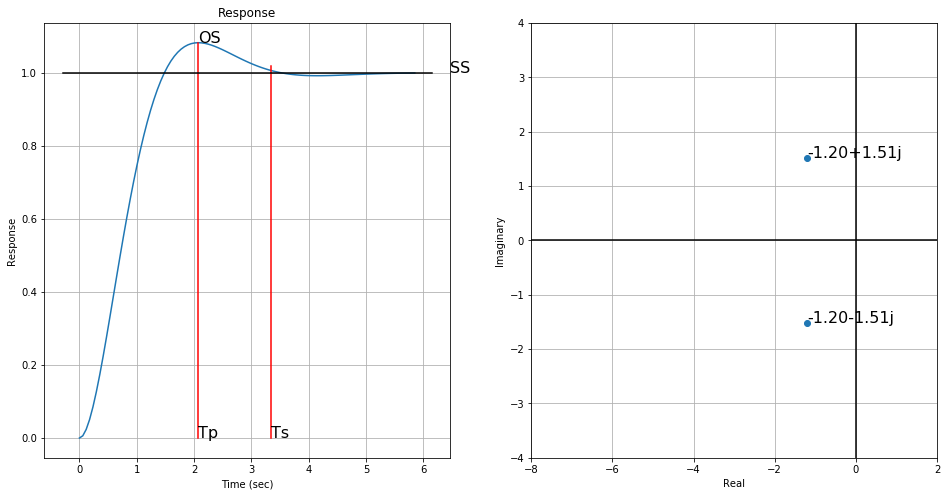

In [4]:
_ = interact(pltresp, zeta=(0,1.5,0.01), wn=(0.0,3,0.01))